**Import Packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

import random
random.seed(123)
np.random.seed(123)

Set Standard deviation parameter

In [72]:
scale_parameter = 7

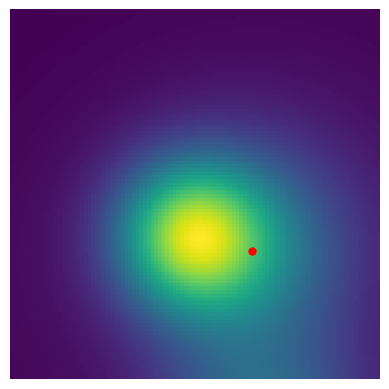

In [75]:
# create 2 kernels
m1 = (1,1)
s1 = np.eye(2)*scale_parameter
k1 = multivariate_normal(mean=m1, cov=s1)

m2 = (1-2*scale_parameter,1+scale_parameter/2)
s2 = np.random.normal(loc=0,scale=scale_parameter,size=4).reshape([2,2])
s2 = np.matmul(s2,s2.transpose()) + (scale_parameter/2)*np.eye(2)
k2 = multivariate_normal(mean=m2, cov=s2)

m3 = (1-scale_parameter/2,1+3*scale_parameter)
s3 = np.random.normal(loc=scale_parameter,scale=(.5*scale_parameter),size=4).reshape([2,2])
s3 = np.matmul(s2,s2.transpose()) + (scale_parameter/10)*np.eye(2)
k3 = multivariate_normal(mean=m3, cov=s3)

m4 = (1,1) + np.random.uniform(low=-.1*scale_parameter,high=.1*scale_parameter,size = 2)
s4 = (scale_parameter/5)*np.eye(2)
k4 = multivariate_normal(mean=m4, cov=s4)

m5 = (1,1) + np.random.uniform(low=-.2*scale_parameter,high=.2*scale_parameter,size = 2)
s5 = (scale_parameter/10)*np.eye(2)
k5 = multivariate_normal(mean=m5, cov=s5)

m6 = (1,1) + np.random.uniform(low=-1*scale_parameter,high=1*scale_parameter,size = 2)
s6 = (scale_parameter/5)*np.eye(2)
k6 = multivariate_normal(mean=m6, cov=s6)

m7 = (1,1) + np.random.uniform(low=-.2*scale_parameter,high=.2*scale_parameter,size = 2)
s7 = np.random.normal(loc=scale_parameter,scale=(.5*scale_parameter),size=4).reshape([2,2])
s7 = np.matmul(s2,s2.transpose()) + (scale_parameter/10)*np.eye(2)
k7 = multivariate_normal(mean=m7, cov=s7)

m8 = (1,1) + np.random.uniform(low=-.2*scale_parameter,high=.2*scale_parameter,size = 2)
s8 = np.random.normal(loc=scale_parameter,scale=(.5*scale_parameter),size=4).reshape([2,2])
s8 = (scale_parameter/10)*np.eye(2)
k8 = multivariate_normal(mean=m8, cov=s8)

# create a grid of (x,y) coordinates at which to evaluate the kernels
xlim = (-3, 3)
ylim = (-3, 3)
xres = 100
yres = 100

x = np.linspace(xlim[0], xlim[1], xres)
y = np.linspace(ylim[0], ylim[1], yres)
xx, yy = np.meshgrid(x,y)

# evaluate kernels at grid points
xxyy = np.c_[xx.ravel(), yy.ravel()]
zz = k1.pdf(xxyy) + k2.pdf(xxyy) + k3.pdf(xxyy) + k4.pdf(xxyy) + k5.pdf(xxyy) + k6.pdf(xxyy) + k7.pdf(xxyy) + k8.pdf(xxyy)

# reshape and plot image
plt.axis('off')
img = zz.reshape((xres,yres))
plt.plot(65, 65, marker="o", markersize=5, markeredgecolor="red", markerfacecolor="red")
plt.imshow(img)
plt.savefig('approximation'+str(scale_parameter)+'.eps', format='eps')
plt.show()